<a href="https://colab.research.google.com/github/DipankarJDutta/DipankarJDutta-Biomarker-discovery-from-B-T-cells-in-FASD-GDM-with-LSTM/blob/Evaluating-Model-Performance/LSTM_B_T_Median_optimized%20model_evaluating%20virgin%20model%20performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Don't display "warnings"
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
# Loading essentials
from numpy import loadtxt
from numpy import reshape
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [0]:
# Fixing random seed to 007 for reproducibility
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)

In [0]:
# Load data
dataset = loadtxt('B-T-median.csv', delimiter = ',')

In [0]:
# Reshape 2D dataset into a 3D dataset with columns as features with one time-step
x = dataset.reshape(56, 1, 30)

In [13]:
#Specify binary output of good (1) and bad (0) learners, y, in x. Learner type differentiated by population median.
y_true = x [:, :, -1]
print (y_true)

[[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [14]:
#Load saved trained model
from keras.models import load_model
model = load_model('B-T-median_LSTM.h5')












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [15]:
#Evaluate the model
evaluate = model.evaluate(x, y_true, verbose=1)

56/56 [==============================] - 0s 5ms/step


In [16]:
# Make predictions
y_pred = model.predict_classes(x)
print (y_pred)

[[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]]


In [17]:
# Determine and print Confusion Matrix (Present true positive (tp), true negative (tn), false positive (fp) and false negative (fn) predictions as a 2 X 2 matrix. Y-axis shows the true classes while the X-axis shows the predicted classes.)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[26,  0],
       [ 0, 30]])

In [18]:
# Determine and print Accuracy (how many observations, both positive and negative, were correctly classified?)
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

1.0

In [19]:
# Determine and print Recall (how many observations out of all positive observations have been classified as positive/True Positive Rate)
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

1.0

In [20]:
#Determine and print Precision (how many observations predicted as positive are in fact positive?)
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

1.0

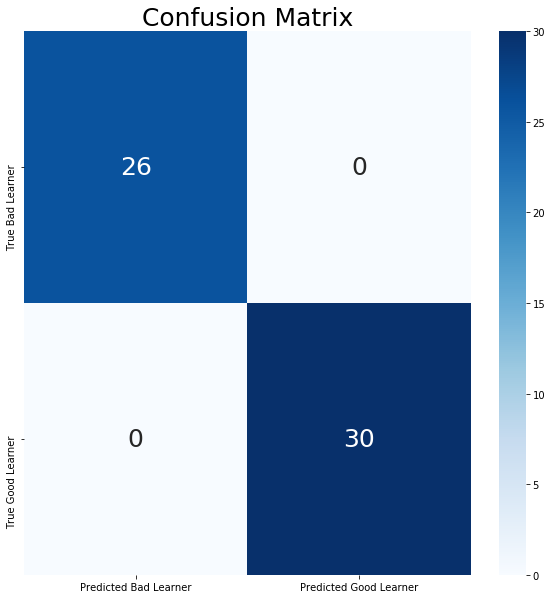

In [21]:
# Make pretty Confusion Matrix with Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,10))
ylabels=['True Bad Learner', 'True Good Learner']
xlabels=['Predicted Bad Learner', 'Predicted Good Learner']
cm = confusion_matrix(y_true, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Blues', annot_kws= {'size':25}, xticklabels=xlabels, fmt='g', yticklabels=ylabels)
bottom, top = ax.get_ylim()
ax.axes.set_title("Confusion Matrix", fontsize=25)
plt.show()

In [40]:
# Determine and print F1 Score (It combines precision and recall into one metric. The higher the score the better our model is)
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average=None)

array([1., 1.])

In [39]:
# Determine and print F1 beta Score (analogous to F1 Score above)
from sklearn.metrics import fbeta_score
fbeta_score(y_true, y_pred, beta=1)

1.0

In [23]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        26
         1.0       1.00      1.00      1.00        30

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [24]:
# AUC-ROC Curve (It is a chart that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR))
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array(y_true)
y_scores = np.array(y_pred)
roc_auc_score(y_true, y_pred)


1.0

In [28]:
# Determine and Print False Positive Rate or Type I Error (How many negative observations have been classified as positive?)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
print (false_positive_rate)

0.0


In [29]:
# Determine and Print False Negative Rate or Type II Error (How many positive observations have been classified as negative?)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
false_negative_rate = fp / (fp + tn)
print (false_negative_rate)

0.0


In [30]:
# Determine and Print True Negative Rate or Specificity (how many observations out of all negative observations have been classified as negative?)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
true_negative_rate = tn / (tn + fp)
print (true_negative_rate)

1.0


In [31]:
# Determine and Print Negative Predictive Value (Precision for negative class; how many predictions out of all negative predictions were correct?)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
negative_predictive_value = tn/ (tn + fn)
print (negative_predictive_value)

1.0


In [32]:
# Determine and Print False Discovery Rate (1-Precision; how many predictions out of all positive predictions were incorrect?)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
false_discovery_rate = fp/ (tp + fp)
print (false_discovery_rate)

0.0


In [41]:
# Determine and Print Cohen kappa metric (Cohen Kappa tells you how much better is your model over the random classifier that predicts based on class frequencies)
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_true, y_pred)

1.0

In [42]:
# Determine and Print Matthews Correlation Coefficient MCC (). It’s a correlation between predicted classes and ground truth.
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_true, y_pred)

1.0

In [49]:
# Determine and Print Average precision score (PR AUC Score). Precision-Recall (PR) is a curve that combines Precision (PPV) and Recall (TPR) in a single visualization. Average Precision Score is the area under the PR Curve.
from sklearn.metrics import average_precision_score
average_precision_score(y_true, y_pred)

1.0

In [50]:
# Determine and Print Log loss (t.ly/w8ZyE, Binary Crossentropic loss)
from sklearn.metrics import log_loss
log_loss (y_true, y_pred)

9.992007221626415e-16

In [52]:
# Determine and Print Brier score (It is a measure of how far your predictions lie from the true values)
from sklearn.metrics import brier_score_loss
brier_score_loss(y_true, y_pred)

0.0

In [54]:
# Determine and Print Kolmogorov-Smirnov statistic (If there is a threshold for which all observations above are truly positive and all observations below are truly negative we get a perfect KS statistic of 1.0.)
from scikitplot.helpers import binary_ks_curve 
res = binary_ks_curve(y_true, y_pred)
ks_stat = res[3]
print (ks_stat)

1.0
